# Install Required Libraries

In [1]:
!pip install gensim

In [2]:
import gensim

In [3]:
from gensim.models import KeyedVectors

##  Importing the Pretrained Word2Vec Model

Gensim provides access to several large pretrained word embeddings such as Google's Word2Vec, FastText, and GloVe. we  import Gensim's API to download and load pretrained models.

In [4]:
import gensim.downloader as api

## Loading the Pretrained Word2Vec Model

In [5]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


Here, we are downloading and loading the Google News Word2Vec model. This model is a Word2Vec model trained on a large corpus of Google News articles.

- 300: The word vectors are 300-dimensional, meaning each word is represented by a vector of 300 numerical values.
- This is the object that contains the word vectors. You can query this object to get the vector representation of a word or find word relationships.

## Get vector for a word

Retrieves the 300-dimensional vector representation of the word "king" from the pretrained Word2Vec model.

In [6]:
vec_king = wv['king']

In [7]:
vec_king.shape

(300,)

In [10]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

This vector encodes the semantic meaning of the word "king" based on the relationships it has with other words in the corpus it was trained on.

In [12]:
# Calculating similarities: "king" vs "queen".
print(f"Word Similarity Scores = {wv.similarity('king', 'queen')}")

Word Similarity Scores = 0.6510956883430481


In [13]:
# Find Similar Words
wv.most_similar('king')

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [14]:
wv.most_similar('happy')

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [16]:
# Solving word analogy problems: king - man + woman ≈ queen.
wv.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [18]:
wv.similarity('coffee', 'tea') # closer to 1 means more similar

0.5635292

In [19]:
# find Outlier Detection
wv.doesnt_match(['breakfast', 'lunch', 'dinner', 'car'])

'car'

In [26]:
# Least similar to "king"
wv.most_similar(negative=['king'], topn=1)

[('By_Settu_Shankar', 0.2764611840248108)]

## Visualize Word Embeddings

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [21]:
# Words to visualize
words = ['king', 'queen', 'man', 'woman', 'coffee', 'tea', 'bread', 'cookies']

# Get word vectors
vectors = [wv[word] for word in words]

In [22]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

In [24]:
reduced_vectors

array([[ 1.45444096, -1.44874491],
       [ 1.54319984, -1.4253279 ],
       [ 1.1596861 ,  1.44097069],
       [ 1.21342616,  1.57646501],
       [-1.5054851 ,  0.35431215],
       [-1.3315244 ,  0.04615798],
       [-0.80694343,  0.4114373 ],
       [-1.72680014, -0.95527033]])

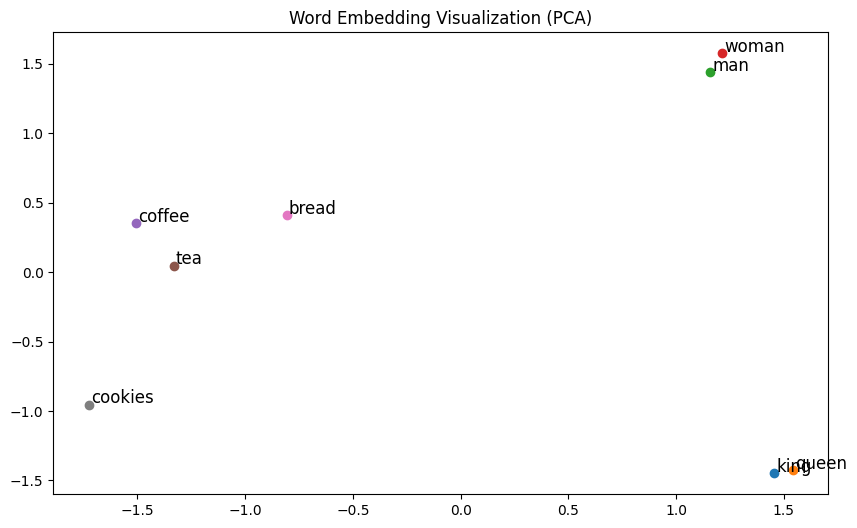

In [25]:
# Plot words
plt.figure(figsize=(10, 6))
for word, vec in zip(words, reduced_vectors):
    plt.scatter(vec[0], vec[1])
    plt.text(vec[0] + 0.01, vec[1] + 0.01, word, fontsize=12)
plt.title('Word Embedding Visualization (PCA)')
plt.show()

In [27]:
wv.most_similar(positive=['teacher', 'hospital'], negative=['doctor'])

[('elementary', 0.6052683591842651),
 ('school', 0.5762953758239746),
 ('teachers', 0.576140284538269),
 ('classroom', 0.5456913113594055),
 ('School', 0.5349582433700562),
 ('Elementary_School', 0.5344264507293701),
 ('Elementary', 0.5304893255233765),
 ('Teacher', 0.5241969227790833),
 ('Intermediate_School', 0.5221602320671082),
 ('Middle_School', 0.5163268446922302)]